c:\Users\Tombra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Tombra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Tombra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Tombra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Tombra\anaconda3\lib\site-packages\sklearn\

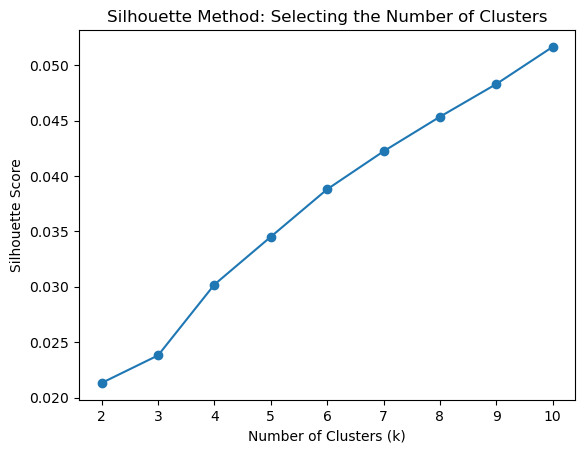

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load data from the CSV file
data_new = pd.read_csv(r"C:\Users\Tombra\New folder\data_new.csv")

# Identify the text column in the dataset
text_data = data_new['DESCRIPTION']

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Compute TF-IDF vectors
tfidf_vectors = vectorizer.fit_transform(text_data)

# Initialize a list to store silhouette scores
silhouette_scores = []

# Specify the range of k values to try
k_values = range(2, 11)

# Perform k-means clustering for each k value and calculate silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_vectors)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(tfidf_vectors, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method: Selecting the Number of Clusters')
plt.show()

c:\Users\Tombra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


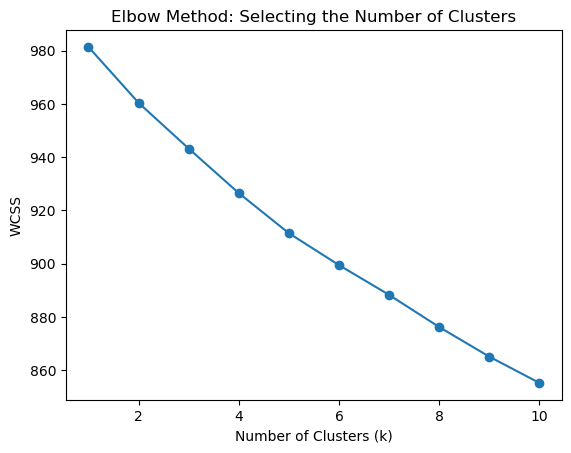

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load data from the CSV file
data_new = pd.read_csv(r"C:\Users\Tombra\New folder\data_new.csv")

# Identify the text column in the dataset
text_data = data_new['DESCRIPTION']


# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Compute TF-IDF vectors
tfidf_vectors = vectorizer.fit_transform(data_new['DESCRIPTION'])

# Calculate within-cluster sum of squares (WCSS) for different values of k
wcss = []
max_k = 10  # Maximum value of k to try
for k in range(1, max_k+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(tfidf_vectors)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, max_k+1), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method: Selecting the Number of Clusters')
plt.show()


c:\Users\Tombra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


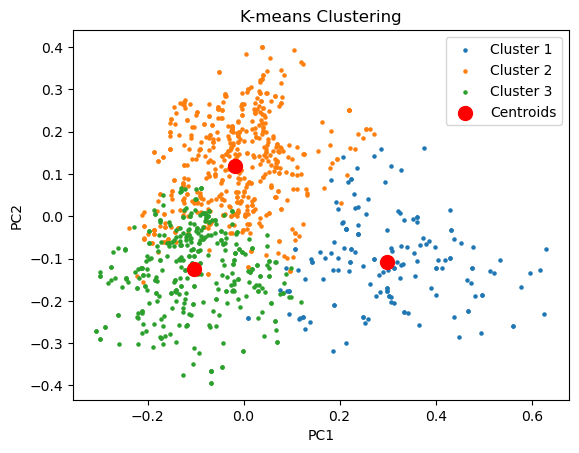

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load data from the CSV file
data_new = pd.read_csv(r"C:\Users\Tombra\New folder\data_new.csv")

# Identify the text column in the dataset
text_data = data_new['DESCRIPTION']

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()
tfidf_vectors = vectorizer.fit_transform(text_data)

# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

# Perform clustering using K-means
num_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_vectors)

# Get cluster labels
cluster_labels = kmeans.labels_

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Create a DataFrame with the original data and assigned cluster labels
df_with_clusters = data_new.copy()
df_with_clusters['label'] = cluster_labels

# Perform PCA transformation on the TF-IDF vectors
pca = PCA(n_components=2)
pca_vectors = pca.fit_transform(tfidf_vectors.toarray())

# Create a DataFrame with PCA transformed data and cluster labels
df_pca_with_clusters = pd.DataFrame(pca_vectors, columns=['pca0', 'pca1'])
df_pca_with_clusters['label'] = cluster_labels

# Transform cluster centroids to PCA space
pca_centroids = pca.transform(centroids)

# Plot the clusters and centroids in PCA space
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')

for cluster_id in range(num_clusters):
    cluster_data = df_pca_with_clusters[df_pca_with_clusters['label'] == cluster_id]
    plt.scatter(cluster_data['pca0'], cluster_data['pca1'], label=f'Cluster {cluster_id+1}', s=5)

plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1], c='red', marker='o', s=100, label='Centroids')

plt.legend()
plt.show()


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load data from the CSV file
data_new = pd.read_csv(r"C:\Users\Tombra\New folder\data_new.csv")

# Identify the text column in the dataset
text_data = data_new['DESCRIPTION']

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Compute TF-IDF vectors
tfidf_vectors = vectorizer.fit_transform(data_new['DESCRIPTION'])

# Perform clustering using K-means
num_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_vectors)

# Get cluster labels
cluster_labels = kmeans.labels_

# Print the cluster labels
print("Cluster Labels:")
print(cluster_labels)


c:\Users\Tombra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Labels:
[0 0 1 ... 0 2 2]


c:\Users\Tombra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


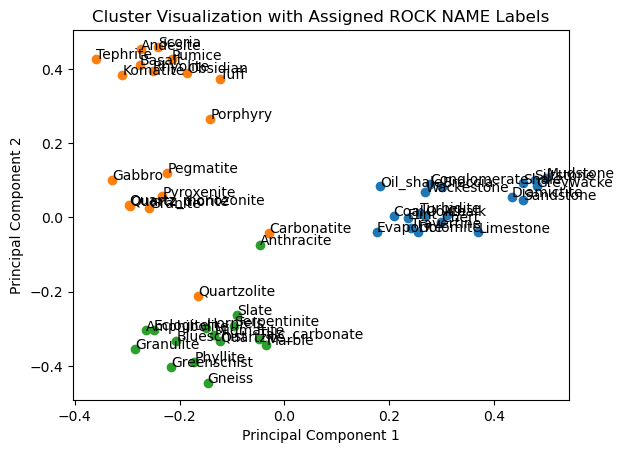

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset from the Excel file
data_path = r"C:\Users\Tombra\New folder\53_classes_description_3.xlsx"
data = pd.read_excel(data_path)

# Specify the column names containing the text descriptions
text_columns = ["DESCRIPTION_1", "DESCRIPTION_2", "DESCRIPTION_3", "DESCRIPTION_4", "DESCRIPTION_5",
                "DESCRIPTION_6", "DESCRIPTION_7", "DESCRIPTION_8", "DESCRIPTION_9", "DESCRIPTION_10",
                "DESCRIPTION_11", "DESCRIPTION_12", "DESCRIPTION_13", "DESCRIPTION_14", "DESCRIPTION_15",
                "DESCRIPTION_16", "DESCRIPTION_17", "DESCRIPTION_18", "DESCRIPTION_19", "DESCRIPTION_20"]

# Combine text from all columns into a single document for each row
data['Combined_Description'] = data[text_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Compute TF-IDF vectors
tfidf_vectors = vectorizer.fit_transform(data['Combined_Description'])

# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

# Perform clustering using K-means
num_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_vectors)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the dataset
data['Cluster'] = cluster_labels

# Encode the "ROCK NAME" labels for evaluation
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(data['ROCK NAME'])

# Calculate accuracy between cluster labels and true labels
accuracy = accuracy_score(true_labels, cluster_labels)

# Define cluster names based on "ROCK NAME" labels
cluster_names = label_encoder.inverse_transform(range(num_clusters))

# Visualize the clusters with the assigned "ROCK NAME" labels
for cluster_id in range(num_clusters):
    cluster_data = reduced_vectors[cluster_labels == cluster_id]
    cluster_true_labels = true_labels[cluster_labels == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=cluster_names[cluster_id])

    for i, label in enumerate(cluster_true_labels):
        plt.annotate(label_encoder.inverse_transform([label])[0], (cluster_data[i, 0], cluster_data[i, 1]))

plt.title('Cluster Visualization with Assigned ROCK NAME Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.legend()
plt.show()